In [1]:
import pyvisa
import matplotlib.pyplot as plt
import time
import numpy as np
from IPython import display
%matplotlib qt5

In [2]:
rm=pyvisa.ResourceManager()
scope= rm.open_resource('USB0::0x0957::0x179A::MY52491615::INSTR')

In [3]:
# vRange=1 refers to 125mv/div. vRange=0 refers to smallest possible value (10mV/div)
vRange=3 #code works for max 16 which refers to 2V/div
tRange= 500e-9 #refers to full scope i.e s/div=tRange/10
trigLevel=0
ch=1

In [4]:
scope.write('*rst')
scope.query('*opc?')

'1\n'

In [5]:
scope.write(f'channel{ch}:range {vRange}')
scope.write(f'timebase:range {tRange}')
scope.write('trigger:mode edge')
scope.write(f'trigger:level channel{ch}, {trigLevel}')

27

In [6]:
scope.write(f'waveform:source channel{ch}')
scope.write('waveform:format byte')
scope.write('digitize')
data= scope.query_binary_values('waveform:data?', datatype='b')

In [7]:
xIncrement = float(scope.query('waveform:xincrement?'))
xOrigin = float(scope.query('waveform:xorigin?'))
xref= float(scope.query('waveform:xreference?'))
yIncrement = float(scope.query('waveform:yincrement?'))
yOrigin = float(scope.query('waveform:yorigin?'))
yref= float(scope.query('waveform:yreference?'))
length = len(data)

In [8]:
#time= []
#wfm =[]
#for t in range(length):
#    time.append((t*xIncrement)+ xOrigin)
#for d in data:
#    wfm.append((d*yIncrement)+ yOrigin)
    
time=[(t* xIncrement) +xOrigin for t in range(length)]
wfm=[((d+128)*yIncrement)+ yOrigin for d in data]
print(yref)


128.0


In [9]:
plt.plot(time,wfm)

In [120]:
46.8-36.2

10.599999999999994

In [127]:
print((max(wfm)-min(wfm))*1000)

10.452262000000005


In [129]:
print(min(wfm))

0.036582917


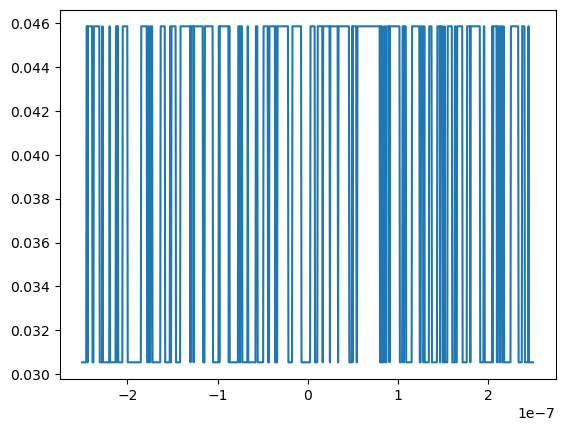

In [327]:
#Actual Code for following Spaceship

i=0;
T_ampl=0.6;
V_dist=0;
V=zi_get _aux _offset(4);
dV=0.005;
r_min=0.6;

dip_V=[[time.time(), 0]];
dip_Vi=0;
top_V=[[time.time(), 0]];
top_Vi=0;
dip_detector _zero _V=[[time.time(), 0]];


plt.ioff()
for i in range(10):
    try:
        scope.write(f'waveform:source channel{ch}')
        scope.write('waveform:format byte')
        scope.write('digitize')
        data= scope.query_binary_values('waveform:data?', datatype='b')
        xIncrement = float(scope.query('waveform:xincrement?'))
        xOrigin = float(scope.query('waveform:xorigin?'))
        xref= float(scope.query('waveform:xreference?'))
        yIncrement = float(scope.query('waveform:yincrement?'))
        yOrigin = float(scope.query('waveform:yorigin?'))
        yref= float(scope.query('waveform:yreference?'))
        length = len(data)
        timeosc=[(t* xIncrement) +xOrigin for t in range(length)]
        wfm=[((d+128)*yIncrement)+ yOrigin for d in data]
        
        a=min(wfm)
        ind=argmin(wfm)
        
        if ind > length/2:
            top_v_cur=np.mean(wfm[:(ind-round(L/10))])
        else:
             top_v_cur=np.mean(wfm[(ind+round(L/10)):])
        
        if top_v_cur > 0.1 #&& a/top_v_cur < 0.9:
            change=0
            if (max(wfm)-a)/max(wfm)<r_min
                print('search')
                # no dip, change V            
                prev_V_dist_sign=-prev_V_dist_sign;
                V_dist=V_dist+dV
                # V=zi_get _aux _offset(4);
                V=V+V_dist*prev_V_dist_sign
                change=1;
            else:
                print('found')
                dip_V=np.append(dip_V,[[time.time(), a]], axis=0);
                dip_Vi=dip_Vi+1;
                top_V=np.append(top_V,[[time.time(), top_v_cur]], axis=0);
                top_Vi=top_Vi+1;
                i=i+1;
                
                V_dist=0
                
                if ind<L/4:
                    V=zi_get_aux_offset(4);
                    V=V+0.002;
                    change=1;
                if ind>3*L/4
                    V=zi_get_aux_offset(4);
                    V=V-0.002;
                    change=1;  
            
            if change:
                small_inno _V=[small_inno _V; now V];
                disp(['------------------------------------------------------------new V ' num2str (V) ' ' datestr(now)])
                if V<1
                    V=V+3;
                if V>5:
                    V=V-4;
                
                zi_set _aux _offset(aux_n, V)

                if V_dist==0:
                    time.sleep(1)
                else:
                    time.sleep(5)
                
        else:
            # no light
            dip_detector _zero _V=np.append( dip_detector _zero _V,[[time.time(), top_v_cur]], axis=0);
        
        #########Code should be ported to python up to here except for ZI communication################## 
        # swap T
        if np.mod(i, 500)==1:        
            print('sweep')
            V_last=V;
            AMPL(AMPLi, 1)=now;
            for j=1:20

                V=zi_get _aux _offset(4);
                V=V+T_ampl/20;
                zi_set _aux _offset(4, V)

                X=scope_read _waveform(visaObj, 1);
                % h1=plot(X(:,2),'k');
                [a ind]=min(X(:,2));
                L=length(X(:,2));
                %[a ind/L]            

                if ind>L/2
                    top_V _cur=mean(X(1:(ind-round(L/10)),2));        
                else
                    top_V _cur=mean(X((ind+round(L/10)):end,2));
                end
                AMPL(AMPLi, j+1)=top_V _cur;  
                pause(0.1)
            end
            Ratio_tip _interf=(max(AMPL(AMPLi-1, 2:end))-min(AMPL(AMPLi-1, 2:end)))/max(AMPL(AMPLi-1, 2:end))
            AMPLi=AMPLi+1;
            ok=0;
            while abs(zi_get _aux _offset(4)-V_last)>0.1
                'get_back'
                V_last
                zi_set _aux _offset(4, V_last)
                pause(0.2)
            end
            i=i+1;
            V=V_last;
            pause(10)
        end
        
        
        
        
        
        
        plt.figure()
        plt.plot(timeosc,wfm)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)
    except KeyboardInterrupt:
        break